CHURN PREDICTION

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
!pip install category_encoders

In [ ]:
import category_encoders as ce

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns
from sklearn.svm import SVC

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
dataset= pd.read_csv("/content/Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:

dataset.shape

(10000, 14)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


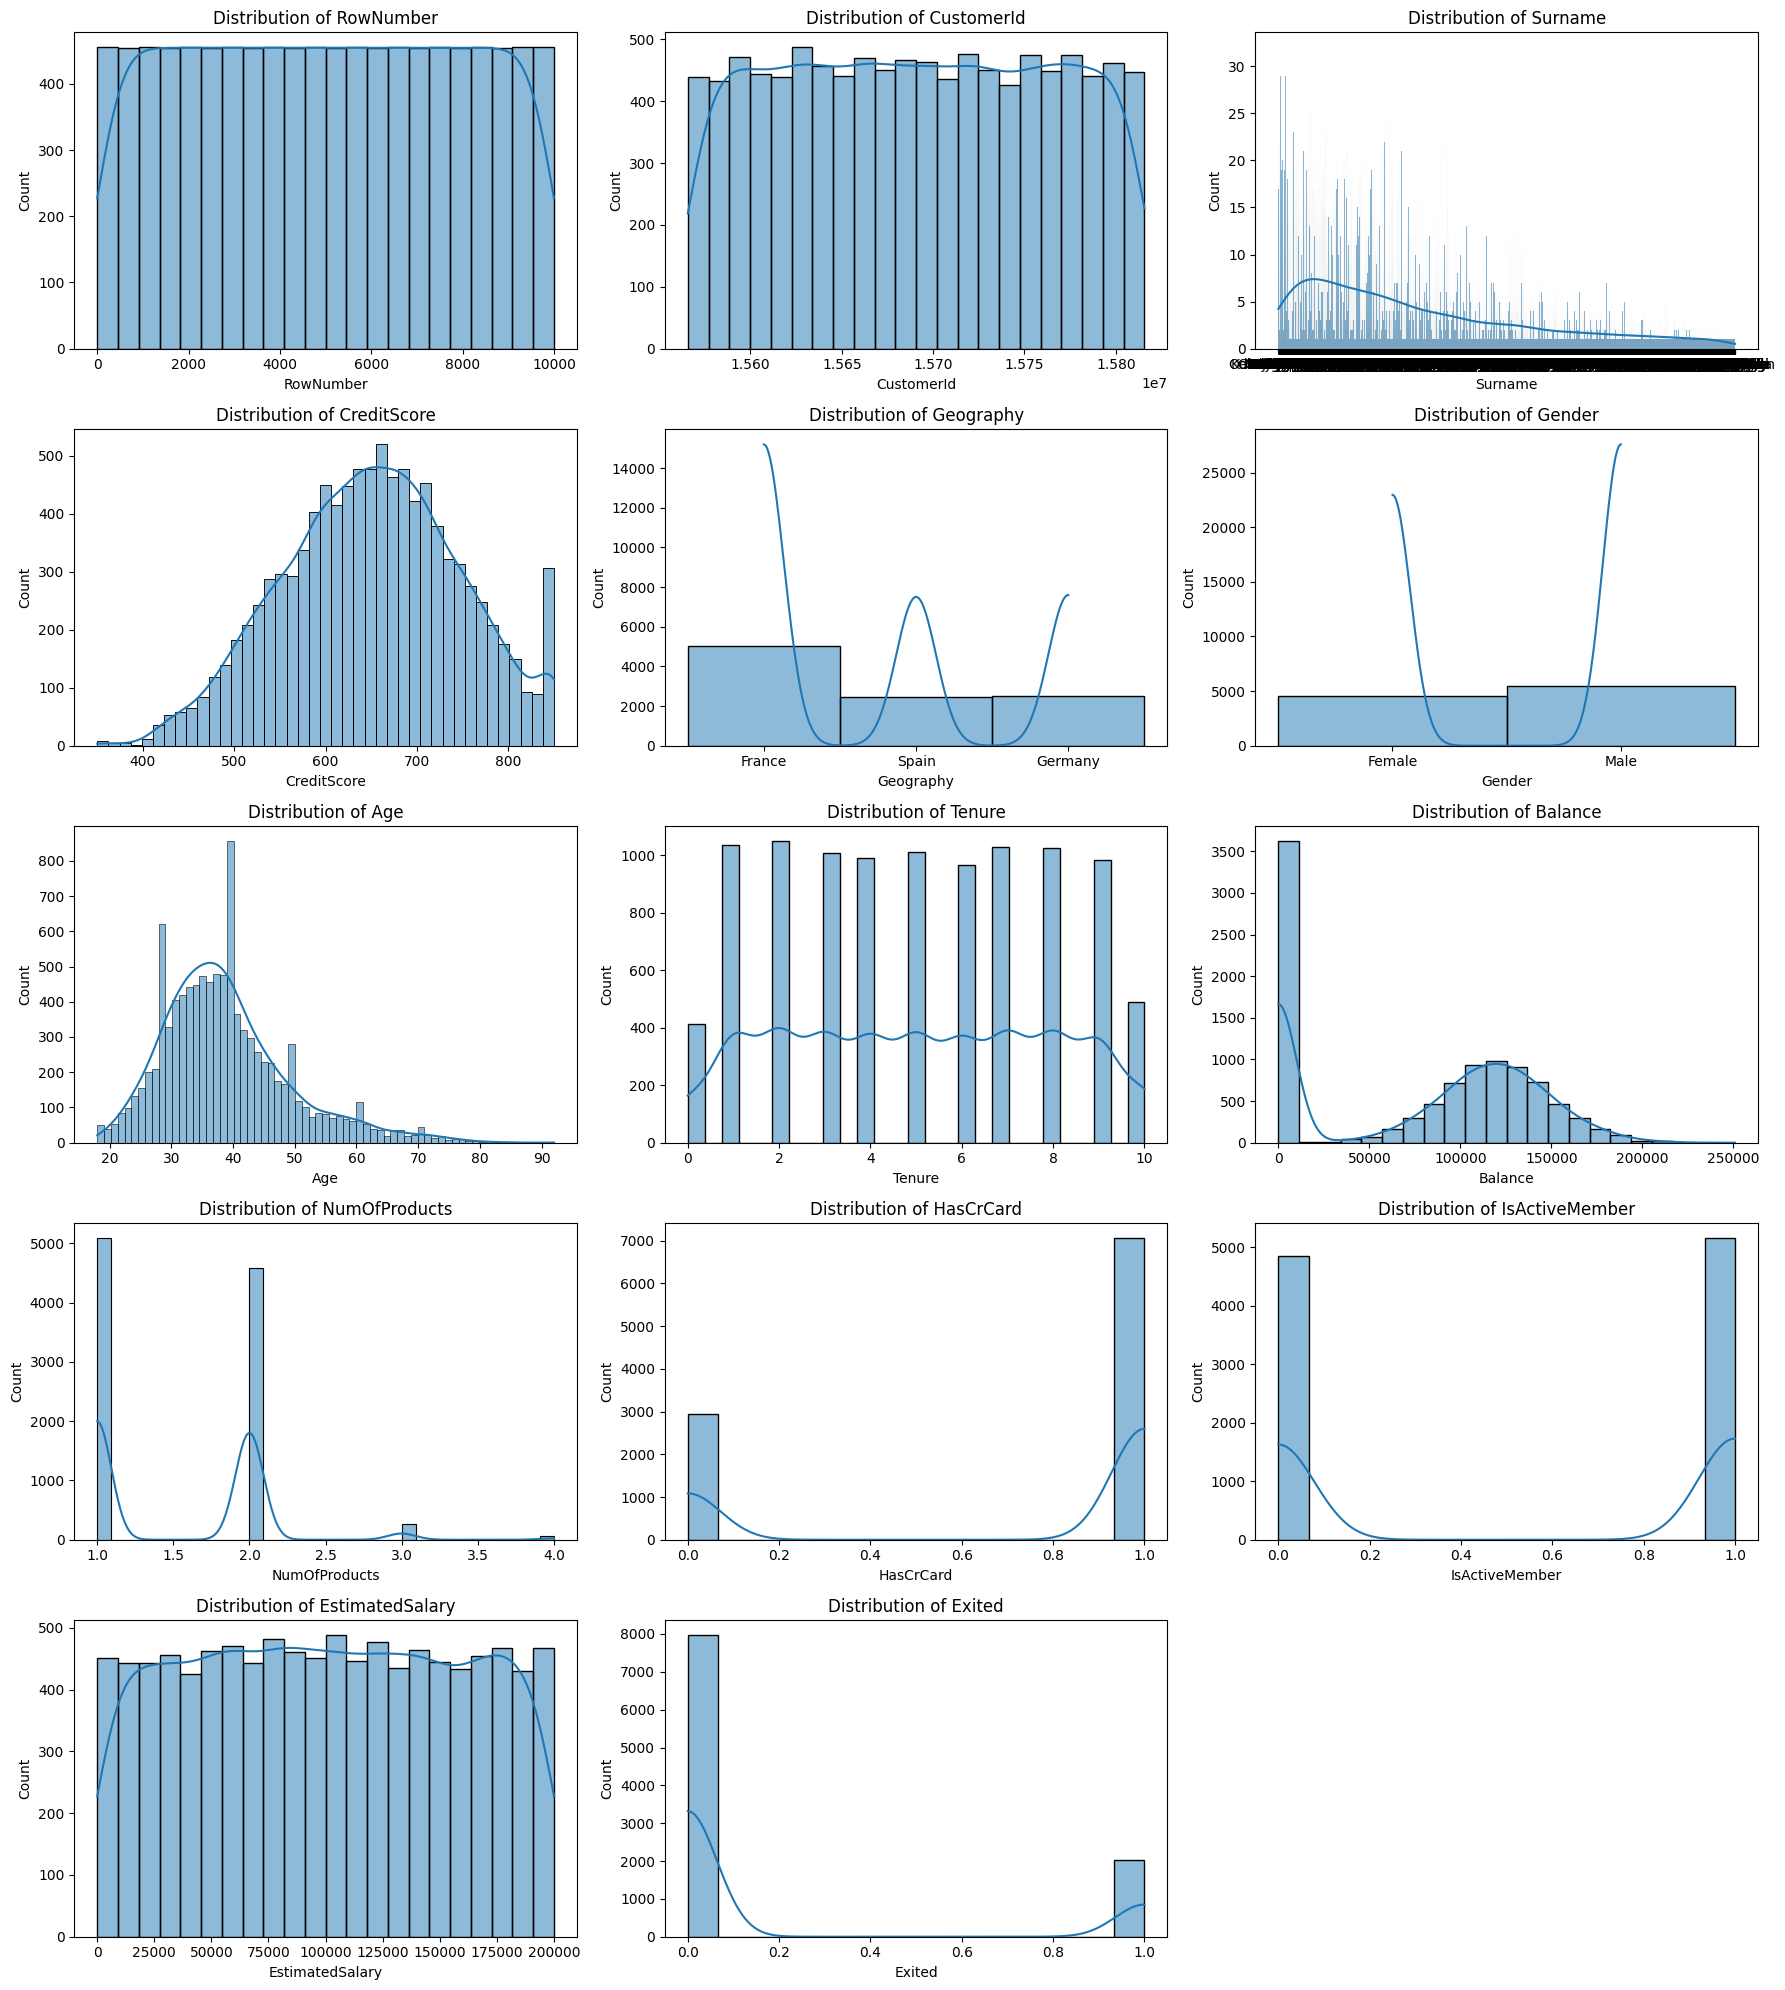

In [ ]:
columns = dataset.columns
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols

plt.figure(figsize=(18, n_rows * 4))

for i, col in enumerate(columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(dataset[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [ ]:
listz=['Age','EstimatedSalary']
for i in listz:
  dataset[i]=dataset[i].replace(0,np.NaN)
  mean=int(dataset[i].mean(skipna=True))
  dataset[i]=dataset[i].replace(np.NaN,mean)

In [ ]:
from sklearn.impute import SimpleImputer

# Assuming dataset is your DataFrame
imputer = SimpleImputer(strategy='most_frequent')
dataset[['Geography', 'Gender','Surname']] = imputer.fit_transform(dataset[['Geography', 'Gender','Surname']])


In [ ]:
dataset.shape

(10000, 14)

In [ ]:
encoder = ce.TargetEncoder(cols=['Geography', 'Gender','Surname'])

# Fit and transform the data (replace 'Exited' with your target column)
encoded_data = encoder.fit_transform(dataset[['Geography', 'Gender','Surname']], dataset['Exited'])

# Update original dataset with encoded values
dataset[['Geography', 'Gender','Surname']] = encoded_data[['Geography', 'Gender','Surname']]

# Print updated dataset
print(dataset)

      RowNumber  CustomerId   Surname  CreditScore  Geography    Gender  Age  \
0             1    15634602  0.307305          619   0.161548  0.250715   42   
1             2    15647311  0.167080          608   0.166734  0.250715   41   
2             3    15619304  0.214417          502   0.161548  0.250715   42   
3             4    15701354  0.207451          699   0.161548  0.250715   39   
4             5    15737888  0.151850          850   0.166734  0.250715   43   
...         ...         ...       ...          ...        ...       ...  ...   
9995       9996    15606229  0.223724          771   0.161548  0.164559   39   
9996       9997    15569892  0.197199          516   0.161548  0.164559   35   
9997       9998    15584532  0.192219          709   0.161548  0.250715   36   
9998       9999    15682355  0.229599          772   0.324432  0.164559   42   
9999      10000    15628319  0.161720          792   0.161548  0.250715   28   

      Tenure    Balance  NumOfProducts 

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,0.307305,619,0.161548,0.250715,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,0.167080,608,0.166734,0.250715,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,0.214417,502,0.161548,0.250715,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,0.207451,699,0.161548,0.250715,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,0.151850,850,0.166734,0.250715,43,2,125510.82,1,1,1,79084.10,0


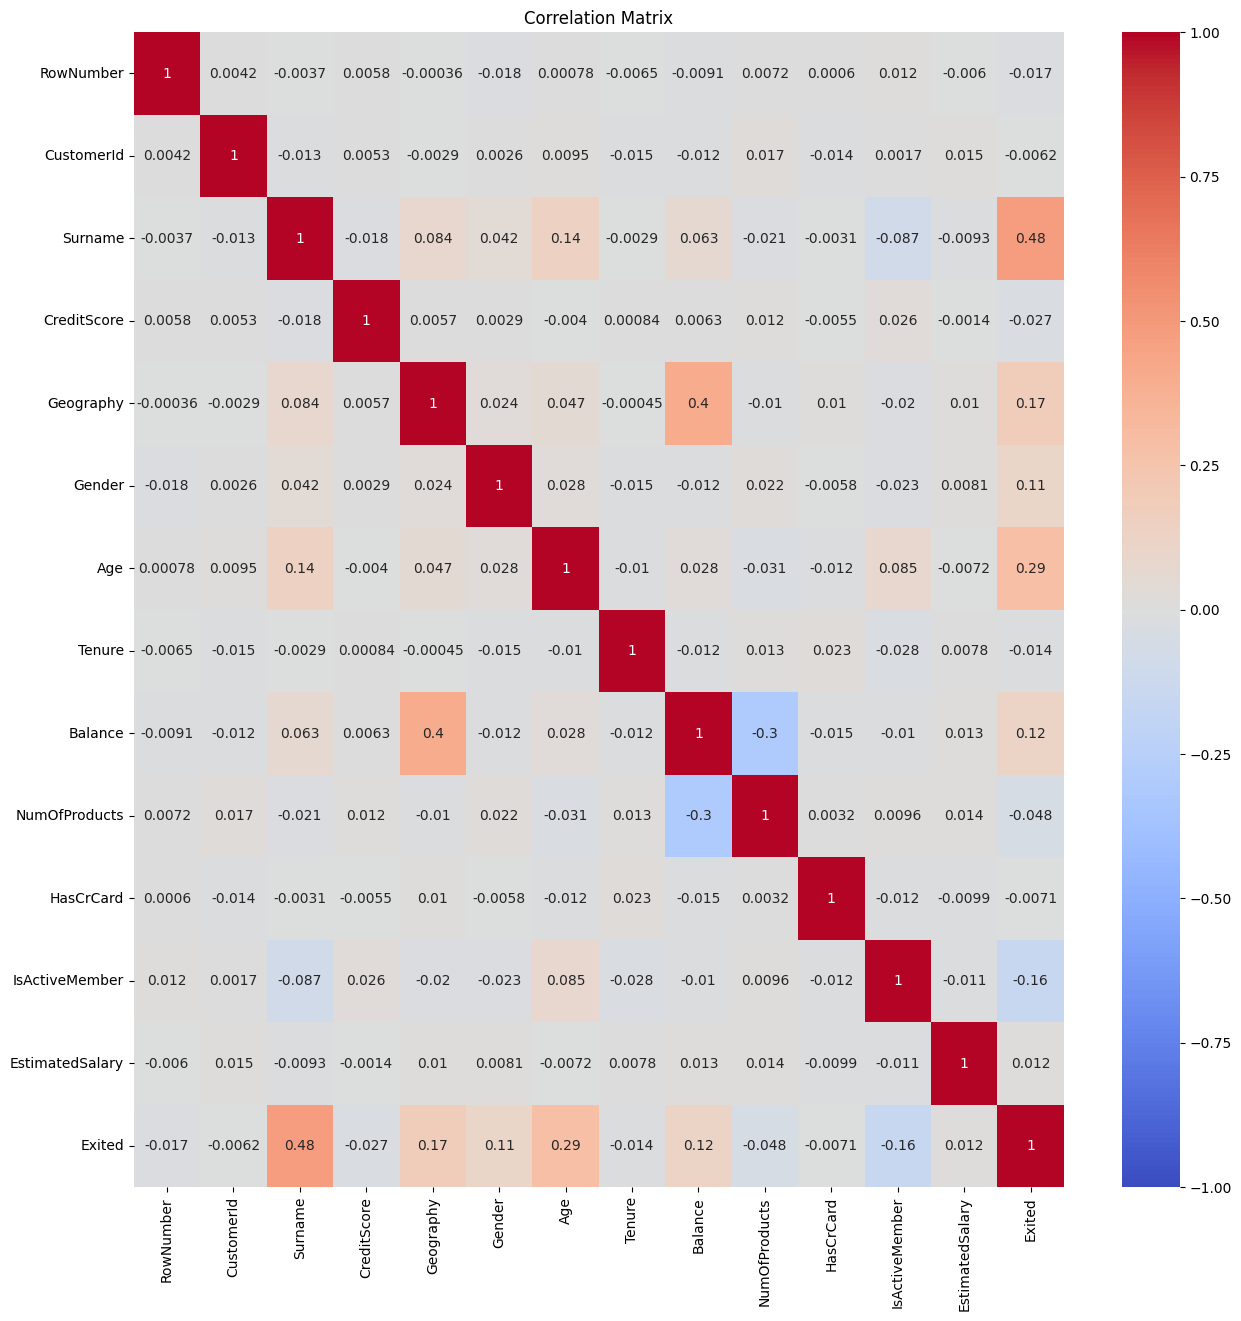

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr = dataset.corr()

# Plot the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
dataset.drop(columns=["RowNumber","CustomerId","HasCrCard"],inplace = True)

In [ ]:
dataset.describe()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.203908,650.528800,0.203700,0.203700,38.921800,5.012800,76485.889288,1.530200,0.515100,100090.239881,0.203700
std,0.039390,96.653299,0.069907,0.042900,10.487806,2.892174,62397.405202,0.581654,0.499797,57510.492818,0.402769
min,0.112001,350.000000,0.161548,0.164559,18.000000,0.000000,0.000000,1.000000,0.000000,11.580000,0.000000
25%,0.176850,584.000000,0.161548,0.164559,32.000000,3.000000,0.000000,1.000000,0.000000,51002.110000,0.000000
50%,0.196374,652.000000,0.161548,0.164559,37.000000,5.000000,97198.540000,1.000000,1.000000,100193.915000,0.000000
75%,0.226850,718.000000,0.324432,0.250715,44.000000,7.000000,127644.240000,2.000000,1.000000,149388.247500,0.000000
max,0.337464,850.000000,0.324432,0.250715,92.000000,10.000000,250898.090000,4.000000,1.000000,199992.480000,1.000000


In [ ]:
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [ ]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5
outliers = ((X < (Q1 - threshold * IQR)) | (X > (Q3 + threshold * IQR)))
print(outliers.sum())

Surname            373
CreditScore         15
Geography            0
Gender               0
Age                359
Tenure               0
Balance              0
NumOfProducts       60
IsActiveMember       0
EstimatedSalary      0
dtype: int64


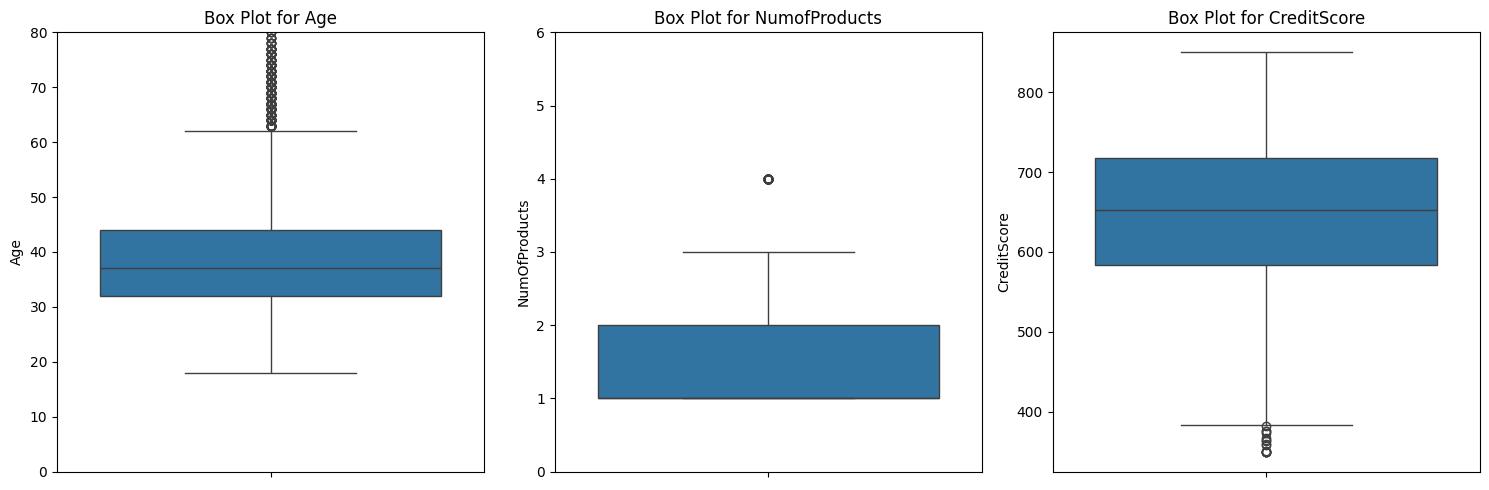

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X is your DataFrame

# Create subplots with specified size
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot 'Age' if it exists in DataFrame X
if 'Age' in X.columns:
    sns.boxplot(data=X, y='Age', ax=axs[0])
    axs[0].set_title('Box Plot for Age')
    axs[0].set_ylim(bottom=0, top=80)

if 'NumOfProducts' in X.columns:
    sns.boxplot(data=X, y='NumOfProducts', ax=axs[1])
    axs[1].set_title('Box Plot for NumofProducts')
    axs[1].set_ylim(bottom=0, top=6)

# Plot 'CreditScore' if it exists in DataFrame X
if 'CreditScore' in X.columns:
    sns.boxplot(data=X, y='CreditScore', ax=axs[2])
    axs[2].set_title('Box Plot for CreditScore')



# Adjust layout
plt.tight_layout()  # Ensures plots fit nicely in the figure area
plt.show()


In [ ]:
def identify_outliers(df, column, threshold=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    outliers_lower = df[column][df[column] < lower_bound]
    outliers_upper = df[column][df[column] > upper_bound]

    return {
        "lower_bound": lower_bound,
        "upper_bound": upper_bound,
        "outliers_below_lower_bound": outliers_lower.tolist(),
        "outliers_above_upper_bound": outliers_upper.tolist()
    }


results = identify_outliers(dataset, 'Age')
print("Lower bound for outliers:", results["lower_bound"])
print("Upper bound for outliers:", results["upper_bound"])
print("Outliers in column 'Age' below lower bound:", results["outliers_below_lower_bound"])
print("Outliers in column 'Age' above upper bound:", results["outliers_above_upper_bound"])
print()
results = identify_outliers(dataset, 'CreditScore')
print("Lower bound for outliers:", results["lower_bound"])
print("Upper bound for outliers:", results["upper_bound"])
print("Outliers in column 'CrediScore' below lower bound:", results["outliers_below_lower_bound"])
print("Outliers in column 'CreditScore' above upper bound:", results["outliers_above_upper_bound"])



Lower bound for outliers: 14.0
Upper bound for outliers: 62.0
Outliers in column 'Age' below lower bound: []
Outliers in column 'Age' above upper bound: [66, 75, 65, 73, 65, 72, 67, 67, 79, 80, 68, 75, 66, 66, 70, 63, 72, 64, 64, 70, 67, 82, 63, 69, 65, 69, 64, 65, 74, 67, 66, 67, 63, 70, 71, 72, 67, 74, 76, 66, 63, 66, 68, 67, 63, 71, 66, 69, 73, 65, 66, 64, 69, 64, 77, 74, 65, 70, 67, 69, 67, 74, 69, 74, 74, 64, 63, 63, 70, 74, 65, 72, 77, 66, 65, 74, 88, 63, 71, 63, 64, 67, 70, 68, 72, 71, 66, 75, 67, 73, 69, 76, 63, 85, 67, 74, 76, 66, 69, 66, 72, 63, 71, 63, 74, 67, 72, 72, 66, 84, 71, 66, 63, 74, 69, 84, 67, 64, 68, 66, 77, 70, 67, 79, 67, 76, 73, 66, 67, 64, 73, 76, 72, 64, 71, 63, 70, 65, 66, 65, 80, 66, 63, 63, 63, 63, 66, 74, 69, 63, 64, 76, 75, 68, 69, 77, 64, 66, 74, 71, 67, 68, 64, 68, 70, 64, 75, 66, 64, 78, 65, 74, 64, 64, 71, 77, 79, 70, 81, 64, 68, 68, 63, 79, 66, 64, 70, 69, 71, 72, 66, 68, 63, 71, 72, 72, 64, 78, 75, 65, 65, 67, 63, 68, 71, 73, 64, 66, 71, 69, 71, 66

In [ ]:

q1 , q3 =dataset['CreditScore'].quantile(0.25),dataset['CreditScore'].quantile(0.75)
iqr = q3 - q1
ll = q1-1.5*iqr
ul = q3 + 1.5*iqr
print(ul)
print(ll)   # Apply outlier treatment for 'CreditScore' column
dataset["CreditScore"] = np.where(dataset["CreditScore"]> ul, dataset["CreditScore"].mean(),
                          np.where(dataset["CreditScore"] < ll, dataset["CreditScore"].mean(),
                                    dataset["CreditScore"]))

print(dataset)

919.0
383.0
       Surname  CreditScore  Geography    Gender  Age  Tenure    Balance  \
0     0.307305        619.0   0.161548  0.250715   42       2       0.00   
1     0.167080        608.0   0.166734  0.250715   41       1   83807.86   
2     0.214417        502.0   0.161548  0.250715   42       8  159660.80   
3     0.207451        699.0   0.161548  0.250715   39       1       0.00   
4     0.151850        850.0   0.166734  0.250715   43       2  125510.82   
...        ...          ...        ...       ...  ...     ...        ...   
9995  0.223724        771.0   0.161548  0.164559   39       5       0.00   
9996  0.197199        516.0   0.161548  0.164559   35      10   57369.61   
9997  0.192219        709.0   0.161548  0.250715   36       7       0.00   
9998  0.229599        772.0   0.324432  0.164559   42       3   75075.31   
9999  0.161720        792.0   0.161548  0.250715   28       4  130142.79   

      NumOfProducts  IsActiveMember  EstimatedSalary  Exited  
0           

In [ ]:
Q1=dataset.quantile(0.25)
Q3=dataset.quantile(0.75)
IQR=Q3-Q1
IQR
print("outlier Counter of the all features")
((dataset < (Q1 - 1.5 * IQR)) | (dataset> (Q3 + 1.5 * IQR))).sum()

outlier Counter of the all features


Surname             373
CreditScore           0
Geography             0
Gender                0
Age                 359
Tenure                0
Balance               0
NumOfProducts        60
IsActiveMember        0
EstimatedSalary       0
Exited             2037
dtype: int64

In [ ]:
X.shape

(10000, 10)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

OVERSAMPLING TECHNIQUE

In [ ]:
smote = SMOTE(random_state=42)
X_train, y_train= smote.fit_resample(X_train, y_train)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)
print(X_train)

[[0.19758185 0.672      0.         ... 0.33333333 1.         0.89555028]
 [0.28916426 0.564      1.         ... 0.33333333 1.         0.98002868]
 [0.45424886 0.418      0.03184029 ... 0.         0.         0.42926087]
 ...
 [0.69895204 0.838      0.00384917 ... 0.         0.         0.96949162]
 [0.61528281 0.596      1.         ... 0.         0.         0.67331913]
 [0.53149009 0.772      0.66480004 ... 0.33333333 0.         0.51790319]]


Logistic Regression

In [ ]:

def evaluate_model(y_true, y_pred):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Calculate metrics
    metrics = precision_recall_fscore_support(y_true, y_pred, average='binary')
    precision, recall, fscore, _ = metrics

    # Plot confusion matrix
    plt.figure(figsize=(4, 2))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Print metrics
    print("\nMetrics:")
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", fscore)

    # Identify TP, FP, TN, FN
    tn, fp, fn, tp = cm.ravel()
    print("\nConfusion Matrix Details:")
    print(f"True Negatives (TN): {tn}")
    print(f"False Positives (FP): {fp}")
    print(f"False Negatives (FN): {fn}")
    print(f"True Positives (TP): {tp}")


In [ ]:
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

score = clf.score(X_test, y_test)
print(f"Accuracy score: {score}")
conf_matrix = confusion_matrix( y_test,y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy score: 0.8045
Confusion Matrix:
[[1331  276]
 [ 115  278]]


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1607
           1       0.50      0.71      0.59       393

    accuracy                           0.80      2000
   macro avg       0.71      0.77      0.73      2000
weighted avg       0.84      0.80      0.82      2000



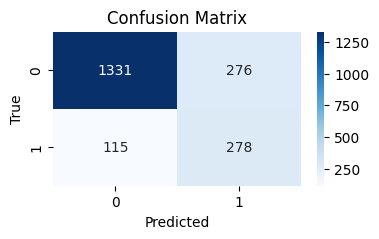


Metrics:
Precision: 0.5018050541516246
Recall: 0.7073791348600509
F1-score: 0.5871172122492081

Confusion Matrix Details:
True Negatives (TN): 1331
False Positives (FP): 276
False Negatives (FN): 115
True Positives (TP): 278


In [ ]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)
evaluate_model(y_test, y_pred)

LOGISTIC REGRESSION

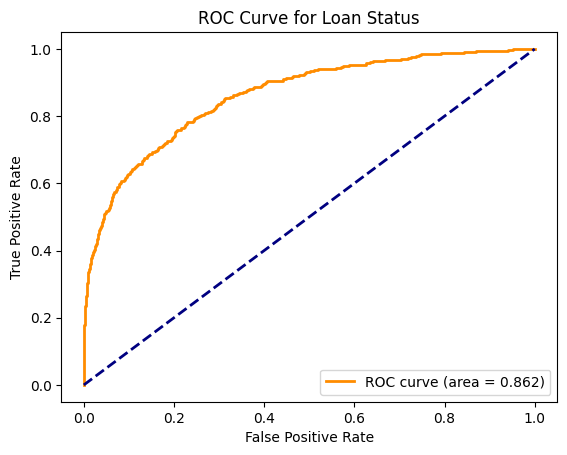

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
y_predProb = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_predProb)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Loan Status')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(
    random_state=42

)

model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")
print(classification_report(y_test, y_pred))


Accuracy: 0.893
ROC AUC: 0.9223198126517098
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1607
           1       0.74      0.70      0.72       393

    accuracy                           0.89      2000
   macro avg       0.83      0.82      0.83      2000
weighted avg       0.89      0.89      0.89      2000



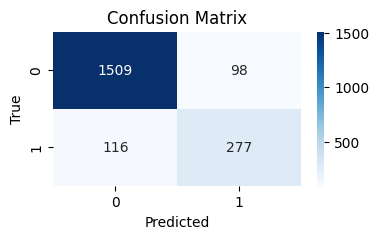


Metrics:
Precision: 0.7386666666666667
Recall: 0.7048346055979644
F1-score: 0.7213541666666666

Confusion Matrix Details:
True Negatives (TN): 1509
False Positives (FP): 98
False Negatives (FN): 116
True Positives (TP): 277


In [ ]:

evaluate_model(y_test, y_pred)


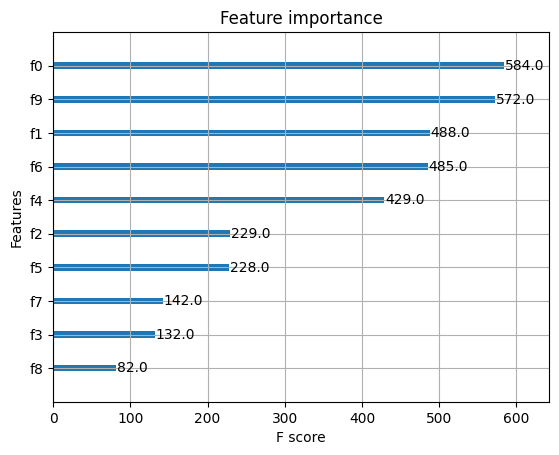

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(model)
plt.show()

XGBOOST

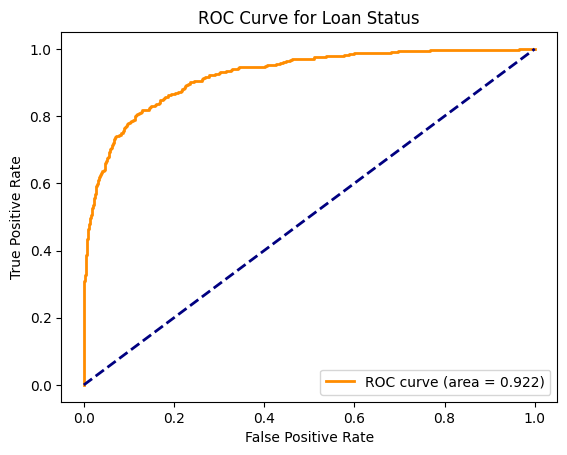

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
y_predProb = model.predict_proba(X_test)[:, 1] # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_predProb) # thresholds : An array␣of thresholds used to compute fpr and tpr.
roc_auc = auc(fpr, tpr) #Compute area under the curve AUC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Loan Status')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100,random_state=42)
rf_classifier.fit(X_train, y_train)

# Making predictions
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output the evaluation results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.881
Confusion Matrix:
 [[1482  125]
 [ 113  280]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93      1607
           1       0.69      0.71      0.70       393

    accuracy                           0.88      2000
   macro avg       0.81      0.82      0.81      2000
weighted avg       0.88      0.88      0.88      2000



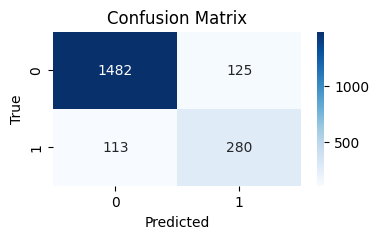


Metrics:
Precision: 0.691358024691358
Recall: 0.712468193384224
F1-score: 0.7017543859649122

Confusion Matrix Details:
True Negatives (TN): 1482
False Positives (FP): 125
False Negatives (FN): 113
True Positives (TP): 280


In [ ]:
evaluate_model(y_test, y_pred)

RANDOM FOREST

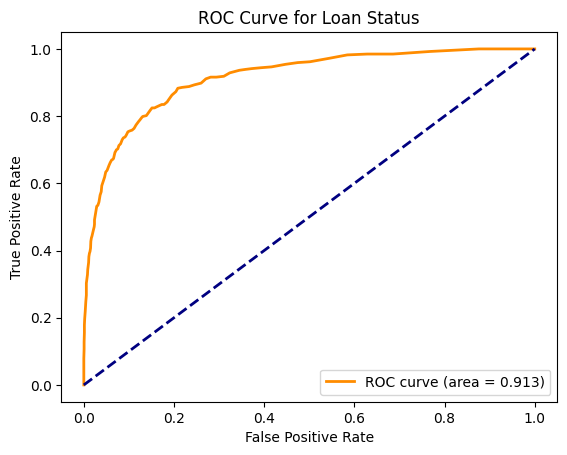

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
y_predProb = rf_classifier.predict_proba(X_test)[:, 1] # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_predProb) # thresholds : An array␣of thresholds used to compute fpr and tpr.
roc_auc = auc(fpr, tpr) #Compute area under the curve AUC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Loan Status')
plt.legend(loc='lower right')
plt.show()

In [ ]:
svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8725

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1607
           1       0.67      0.69      0.68       393

    accuracy                           0.87      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.87      0.87      0.87      2000


Confusion Matrix:
[[1474  133]
 [ 122  271]]


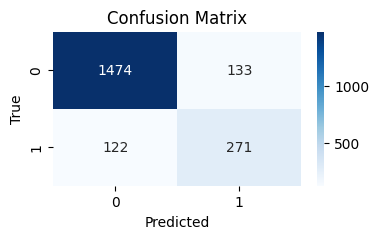


Metrics:
Precision: 0.6707920792079208
Recall: 0.6895674300254453
F1-score: 0.6800501882057717

Confusion Matrix Details:
True Negatives (TN): 1474
False Positives (FP): 133
False Negatives (FN): 122
True Positives (TP): 271


In [ ]:
evaluate_model(y_test, y_pred)

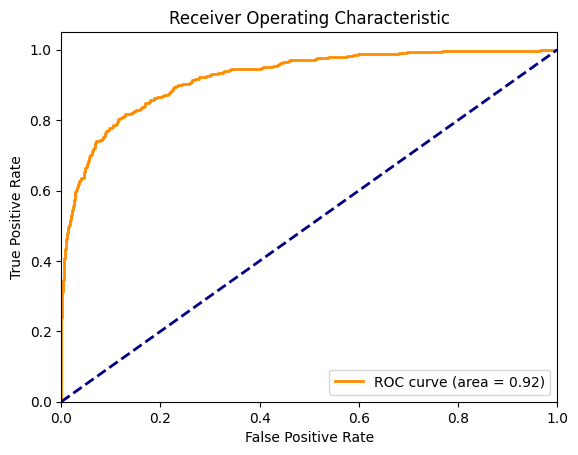

In [ ]:
# Predict probabilities for the test set
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()